## 사용법

- 학습하신 모델의 

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.metrics import confusion_matrix
import json

In [61]:
label_categories = {'no_relation': 0, 'org:top_members/employees': 1, 'org:members': 2, 'org:product': 3, 'per:title': 4, 'org:alternate_names': 5, 'per:employee_of': 6, 'org:place_of_headquarters': 7, 'per:product': 8, 'org:number_of_employees/members': 9, 'per:children': 10, 'per:place_of_residence': 11, 'per:alternate_names': 12, 'per:other_family': 13, 'per:colleagues': 14, 'per:origin': 15, 'per:siblings': 16, 'per:spouse': 17, 'org:founded': 18, 'org:political/religious_affiliation': 19, 'org:member_of': 20, 'per:parents': 21, 'org:dissolved': 22, 'per:schools_attended': 23, 'per:date_of_death': 24, 'per:date_of_birth': 25, 'per:place_of_birth': 26, 'per:place_of_death': 27, 'org:founded_by': 28, 'per:religion': 29}
list(label_categories)

['no_relation',
 'org:top_members/employees',
 'org:members',
 'org:product',
 'per:title',
 'org:alternate_names',
 'per:employee_of',
 'org:place_of_headquarters',
 'per:product',
 'org:number_of_employees/members',
 'per:children',
 'per:place_of_residence',
 'per:alternate_names',
 'per:other_family',
 'per:colleagues',
 'per:origin',
 'per:siblings',
 'per:spouse',
 'org:founded',
 'org:political/religious_affiliation',
 'org:member_of',
 'per:parents',
 'org:dissolved',
 'per:schools_attended',
 'per:date_of_death',
 'per:date_of_birth',
 'per:place_of_birth',
 'per:place_of_death',
 'org:founded_by',
 'per:religion']

In [88]:
def confusion_matrix_graph(df: pd.DataFrame):
    """
    주어진 데이터프레임(df)의 'label'과 'pred_label' 열을 사용하여 confusion matrix을 계산하고
    heatmap 형태로 시각화합니다.

    arguments:
        df (pd.DataFrame): 'label'과 'pred_label' 열이 포함된 데이터프레임
    
    return:
        None. 함수는 confusion matrix heatmap을 출력합니다.
    """
    # confusion matrix 계산
    cm = confusion_matrix(df['label'], df['pred_label'])

    # 커스텀 컬러맵 생성
    cmap = mcolors.ListedColormap(['white', 'pink', 'tomato'])  

    # 정규화를 위한 경계값 설정
    bounds = [0.5, 1.0, 10.0, cm.max() + 0.5]  # 1.0, 10.0을 경계값으로 설정

    # 컬러맵을 적용할 값의 범위 설정
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    # 라벨 설정
    labels = sorted(list(df['label'].unique()))

    # heatmap 그리기
    plt.figure(figsize=(10, 7))
    ax =sns.heatmap(cm, annot=True, annot_kws={"size":8}, cmap=cmap, norm=norm, fmt='g', xticklabels=labels, yticklabels=labels)

    # 축 이름 및 제목 설정
    ax.set_yticklabels(list(label_categories), rotation=0, fontsize=8)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    
    # 그래프 표시
    plt.show()


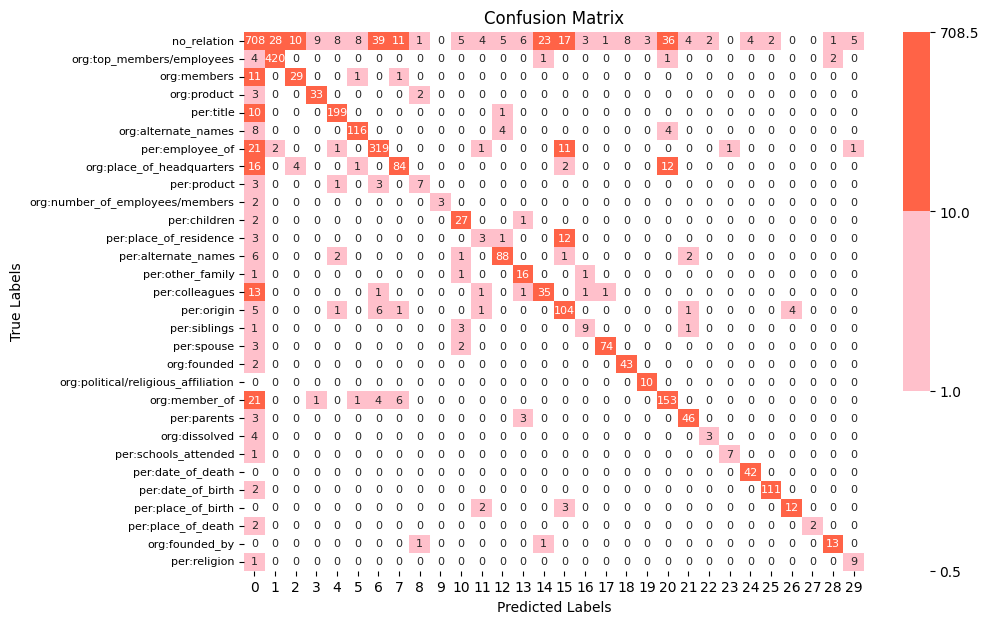

In [89]:
config_file_name = 'roberta_large_config_add_val.json'

with open(f'../configs/{config_file_name}', 'r') as f:
    config = json.load(f)
    
val_prediction_df = pd.read_csv('../prediction/'+'val_'+'_'.join(config['arch']['model_name'].split('/') + config['arch']['model_detail'].split())+'_submission.csv')

confusion_matrix_graph(val_prediction_df)